In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [158]:
df  = pd.read_csv('penguins_lter.csv')

In [159]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


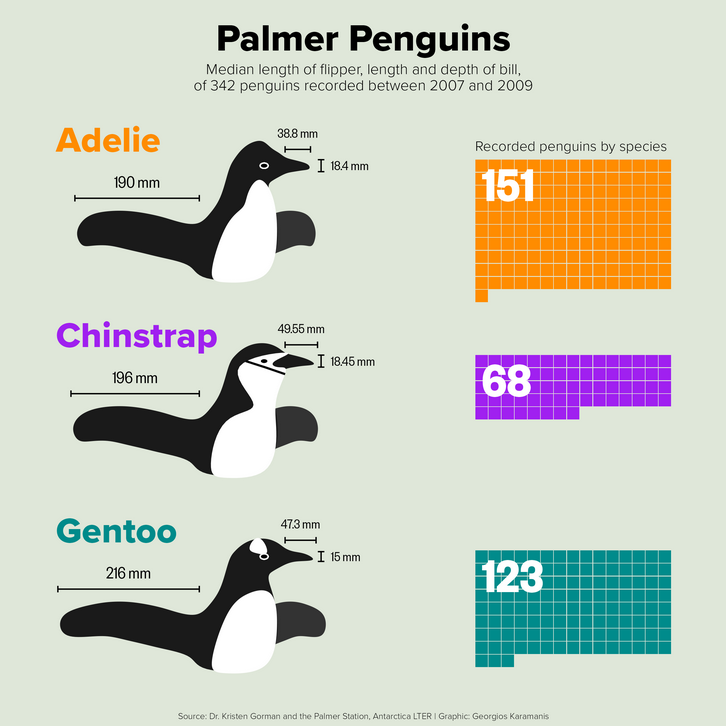

In [160]:
df['Clutch Completion'].value_counts()

Clutch Completion
Yes    308
No      36
Name: count, dtype: int64

In [161]:
df.shape

(344, 17)

In [162]:
df['Stage'].value_counts()

Stage
Adult, 1 Egg Stage    344
Name: count, dtype: int64

In [163]:
df['Delta 15 N (o/oo)'].isna().sum()

np.int64(14)

In [164]:
df['Delta 13 C (o/oo)'].isna().sum()

np.int64(13)

In [165]:
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [166]:
df = df[['Culmen Length (mm)', 'Culmen Depth (mm)',
         'Flipper Length (mm)', 'Body Mass (g)',
         'Island', 'Sex', 'Species']]

In [167]:
df.isna().sum()

Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Island                  0
Sex                    10
Species                 0
dtype: int64

In [168]:
df = df.dropna()


In [169]:
df.isna().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Island                 0
Sex                    0
Species                0
dtype: int64

In [170]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [171]:
df.dtypes

Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Island                  object
Sex                     object
Species                 object
dtype: object

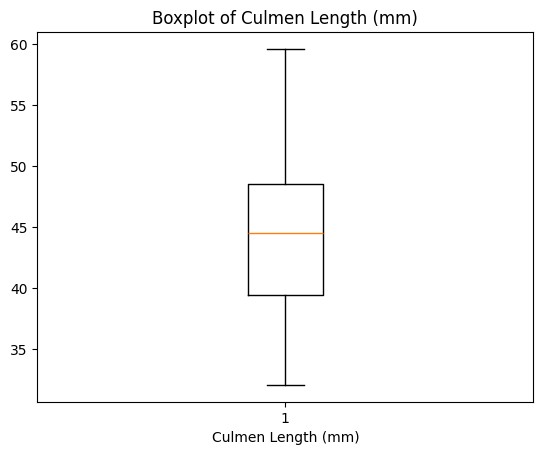

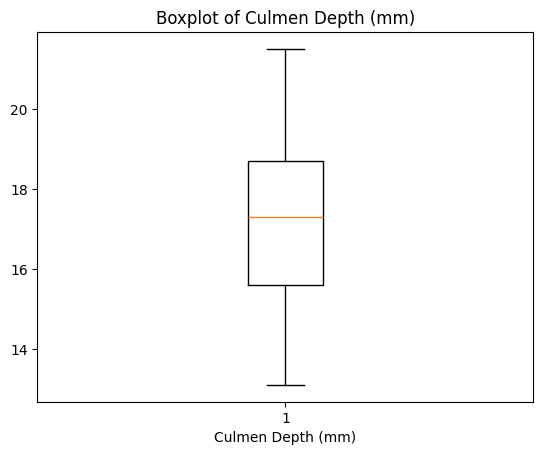

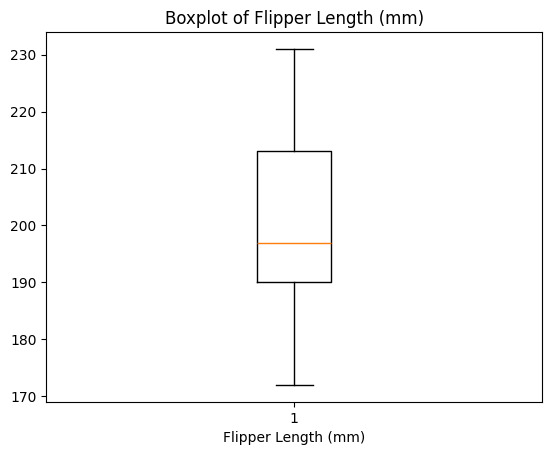

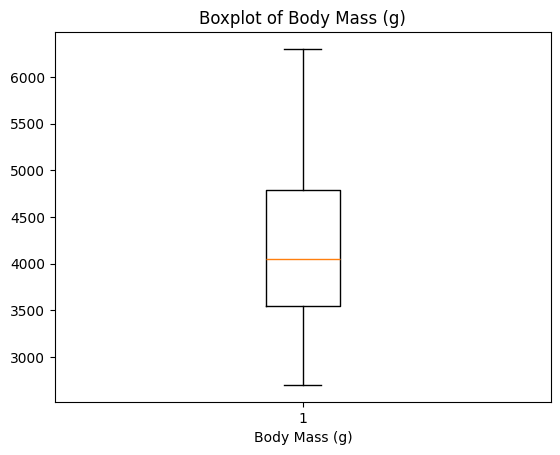

In [172]:
for col in df:
    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])   
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()

In [173]:
df.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island,Sex,Species
0,39.1,18.7,181.0,3750.0,Torgersen,MALE,Adelie Penguin (Pygoscelis adeliae)
1,39.5,17.4,186.0,3800.0,Torgersen,FEMALE,Adelie Penguin (Pygoscelis adeliae)
2,40.3,18.0,195.0,3250.0,Torgersen,FEMALE,Adelie Penguin (Pygoscelis adeliae)
4,36.7,19.3,193.0,3450.0,Torgersen,FEMALE,Adelie Penguin (Pygoscelis adeliae)
5,39.3,20.6,190.0,3650.0,Torgersen,MALE,Adelie Penguin (Pygoscelis adeliae)


In [174]:
df['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [175]:
df.loc[df['Sex'] == '.']

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island,Sex,Species
336,44.5,15.7,217.0,4875.0,Biscoe,.,Gentoo penguin (Pygoscelis papua)


In [176]:
df = df.drop(df.loc[df['Sex'] == '.'].index)

In [177]:
df['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [178]:
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          146
Gentoo penguin (Pygoscelis papua)            119
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

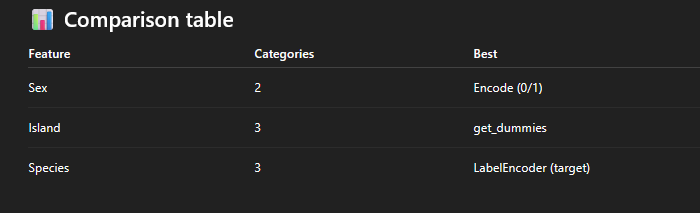

In [179]:
df['Island'].value_counts()

Island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

In [180]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

cols = ['Sex' ,'Species']
for col in cols:
    df[col] = lab.fit_transform(df[col])

In [181]:
df = pd.get_dummies(df, columns=['Island'], drop_first=True, dtype= int)

In [182]:
df.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Species,Island_Dream,Island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1


In [183]:
df1 = df['Species'].value_counts()
df1

Species
0    146
2    119
1     68
Name: count, dtype: int64

<BarContainer object of 3 artists>

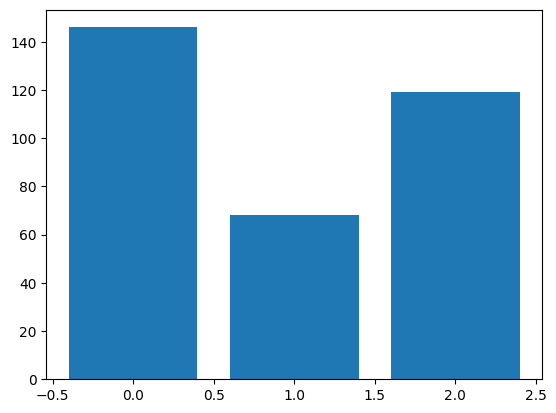

In [184]:
plt.bar(df1.index,df1.values)

In [185]:
x = df.drop('Species',axis= 1).values
y = df['Species'].values


In [186]:
x.shape

(333, 7)

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [189]:
from keras.models import Sequential
from keras.layers import Dense

In [190]:
ann = Sequential()

#input layer
ann.add(Dense(units=7,activation= 'relu'))

#hidden layer
ann.add(Dense(units=10, activation='relu'))

#hidden layer
ann.add(Dense(units=6, activation='relu'))

#output layer
ann.add(Dense(units=3,activation='softmax'))

In [191]:
ann.compile(optimizer = 'adam' , loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [192]:
x.shape

(333, 7)

In [193]:
ann.fit(x_train , y_train ,epochs= 100 , batch_size = 32 )


Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5322 - loss: 1.1729
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5279 - loss: 1.1189 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5193 - loss: 1.0740 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5193 - loss: 1.0331 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5150 - loss: 0.9954 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5193 - loss: 0.9593
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5279 - loss: 0.9242 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5064 - loss: 0.8853
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5107 - loss: 0.8474 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6009 - loss: 0.8080 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7468 - loss: 0.7695
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7682 - loss: 0.7325
Ep

In [194]:
ann.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9900 - loss: 0.0110 


[0.011019201017916203, 0.9900000095367432]

In [196]:
df.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Species,Island_Dream,Island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,1


In [197]:
y_pred =ann.predict(scaler.transform([[39.1	,18.7	,181.0	,3750.0	,1	,	0,	1]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[9.9999499e-01, 4.8407878e-06, 1.7171186e-07]], dtype=float32)

In [198]:
ind = np.argmax(y_pred)
ind

np.int64(0)

In [199]:
output = lab.inverse_transform([ind])
output

array(['Adelie Penguin (Pygoscelis adeliae)'], dtype=object)